
# Задание к лекции 04-1: Линейная регрессия 1

Name: Егоров А.С.

Email: Egorov_AS@mgpu.ru




## Упражнение: амфетамин и аппетит

Амфетамин – препарат, подавляющий аппетит. В исследовании этого эффекта фармаколог случайным образом распределил 24 крысы на три группы лечения, которым вводили инъекцию амфетамина в одной из двух дозировок (2,5 мг/кг или 5,0 мг/кг) или инъекцию физиологического раствора (0 мг). /кг). Он измерил количество пищи, потребляемой каждым животным (в г/кг) в течение 3-часового периода после инъекции. Результаты (граммы потребляемой пищи на кг массы тела) показаны ниже.


In [1]:
# imports and setup

import scipy as sc
import numpy as np

import pandas as pd
import statsmodels.formula.api as sm
from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Experiment results:

food_consump_dose0 = [112.6, 102.1, 90.2, 81.5, 105.6, 93.0, 106.6, 108.3]
food_consump_dose2p5 = [73.3, 84.8, 67.3, 55.3, 80.7, 90.0, 75.5, 77.1]
food_consump_dose5 = [38.5, 81.3, 57.1, 62.3, 51.5, 48.3, 42.7, 57.9]

## Упражнение 4-1.1: Диаграмма рассеяния и линейная регрессия

**Упражнение:** Постройте диаграмму рассеяния, указав дозу в качестве переменной $x$ и потребление пищи в качестве переменной $y$. Затем запустите линейную регрессию данных, используя функцию `ols` из библиотеки `Python statsmodels`, чтобы связать переменные по

$$
\text{Потребление пищи} = \beta_0 + \beta_1 \text{Доза}.
$$

Какое получается линейное уравнение? Каково значение $R^2$? Считаете ли вы, что переменные имеют сильную линейную связь? Добавьте линию тренда к диаграмме рассеяния.

1. Построим диаграмму рассеяния, указав дозу в качестве переменной  x  и потребление пищи в качестве переменной  y .

In [7]:
# Создадим переменные dose(включает в себя количество различных доз крысам) и food_consumption(представляет собой сумму перемнных food_consump_dose)
dose = [0]*len(food_consump_dose0) + [2.5]*len(food_consump_dose2p5) + [5]*len(food_consump_dose5)
food_consump = food_consump_dose0 + food_consump_dose2p5 + food_consump_dose5
print('Доза', dose)
print('Потребление пищи', food_consump)

Доза [0, 0, 0, 0, 0, 0, 0, 0, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 5, 5, 5, 5, 5, 5, 5, 5]
Потребление пищи [112.6, 102.1, 90.2, 81.5, 105.6, 93.0, 106.6, 108.3, 73.3, 84.8, 67.3, 55.3, 80.7, 90.0, 75.5, 77.1, 38.5, 81.3, 57.1, 62.3, 51.5, 48.3, 42.7, 57.9]


Построим диаграмму рассеяния с помощью библиотеки matplotlib. На оси x доза(мг/кг), y=food_consump(г/кг).

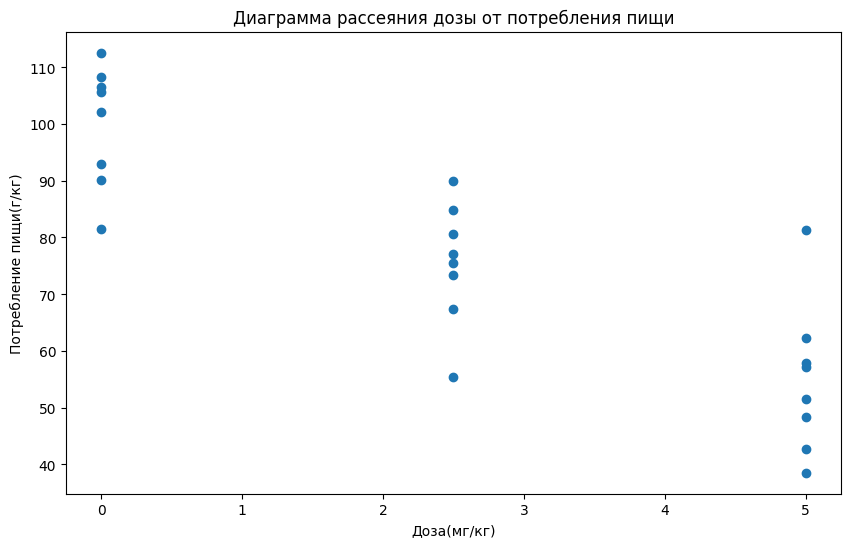

In [48]:
plt.scatter(dose, food_consump)
plt.xlabel('Доза(мг/кг)')
plt.ylabel('Потребление пищи(г/кг)')
plt.title('Диаграмма рассеяния дозы от потребления пищи')
plt.show()

2. Запустим линейную регрессию данных

In [30]:
# Создадим датафрейм из созданных ранее списков с помощбю pandas
dict = {'dose': dose, 'food_consump': food_consump}
df = pd.DataFrame(dict)
df

,dose,food_consump
0,0.0,112.6
1,0.0,102.1
2,0.0,90.2
3,0.0,81.5
4,0.0,105.6
5,0.0,93.0
6,0.0,106.6
7,0.0,108.3
8,2.5,73.3
9,2.5,84.8


In [45]:
m = sm.ols(formula='food_consump ~ dose', data = df).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:           food_consump   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     62.41
Date:                Mon, 13 May 2024   Prob (F-statistic):           7.27e-08
Time:                        09:38:25   Log-Likelihood:                -91.420
No. Observations:                  24   AIC:                             186.8
Df Residuals:                      22   BIC:                             189.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     99.3313      3.680     26.994      0.0

In [46]:
# Ипользуем функцию ols из библиотеки Python statsmodels, чтобы найти переменные β0 и β1
print(m.params)

Intercept    99.33125
dose         -9.00750
dtype: float64


β0=99.33,

β1=−9.01

Уравнение получается: Потребление пищи = 99.33 - 9.01 * Доза

In [47]:
#Найдем значение R2
print('R2 = ', m.rsquared)

R2 =  0.7393816482704202


**Ваш ответ:** R2 = 0,74 означает, что модель объясняет 74% изменчивости потребления пищи.

Значение  p  крайне мало, а значит, это указывает на сильную линейную связь и подтверждает значимость модели.

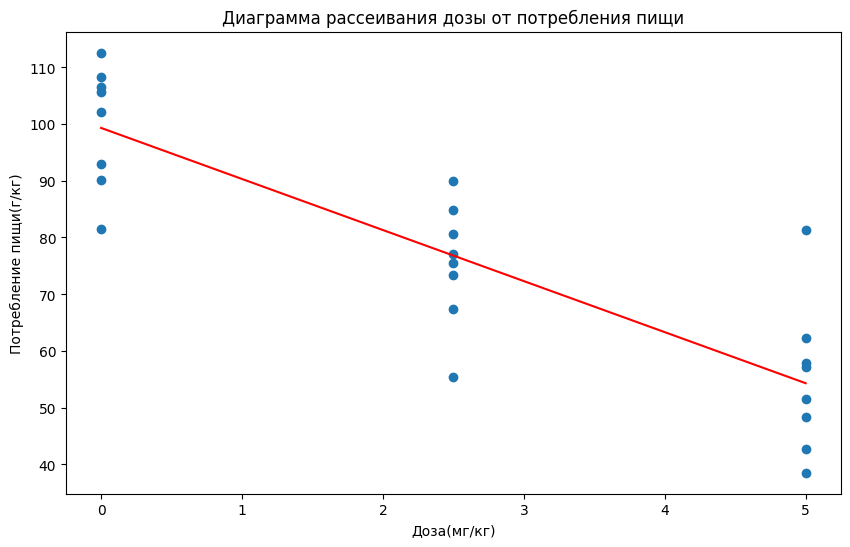

In [49]:
# Добавим линию тренда к графику
plt.scatter(dose, food_consump)
plt.plot(df['dose'], m.predict(), color='red')
plt.xlabel('Доза(мг/кг)')
plt.ylabel('Потребление пищи(г/кг)')
plt.title('Диаграмма рассеяния дозы от потребления пищи')
plt.show()

Из Диаграммы рассеяния следует, что существует взаимосвязь между дозой амфитамина и количествои потребления пищи. Вывод, что чем больше доза амфитамина в инъекции, тем меньше объем потребления пищи потребляет крыса.

## Задание 4-1.2: Невязка(остатки) значения

Регрессия в Упражнении 4-1.1 на самом деле валидна, даже несмотря на то, что предиктор $x$ имеет только 3 различных значения; для каждого фиксированного значения $x$ исследователь собрал случайную выборку значений $y$.

Однако одно предположение, которое делается с помощью простой линейной регрессии, заключается в том, что остатки имеют примерно нормальное распределение.

**Упражнение:** Вычислите остатки для приведенной выше регрессии и постройте нормальный вероятностный график остатков. Как вы думаете, они нормально распределены?



In [51]:
# Вычислим остатки
residuals = m.resid
print(residuals)

0     13.26875
1      2.76875
2     -9.13125
3    -17.83125
4      6.26875
5     -6.33125
6      7.26875
7      8.96875
8     -3.51250
9      7.98750
10    -9.51250
11   -21.51250
12     3.88750
13    13.18750
14    -1.31250
15     0.28750
16   -15.79375
17    27.00625
18     2.80625
19     8.00625
20    -2.79375
21    -5.99375
22   -11.59375
23     3.60625
dtype: float64


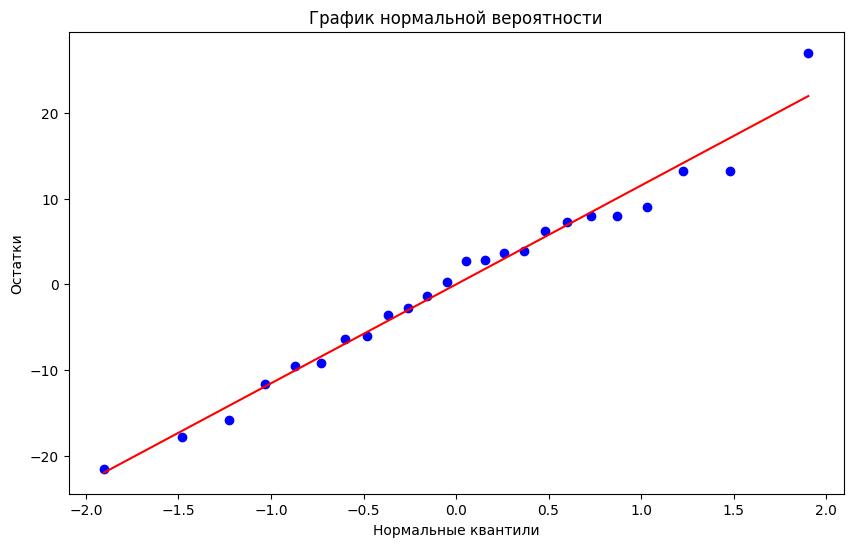

In [54]:
#Построим нормальный вероятностный график остатков
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot = plt)
plt.title('График нормальной вероятности')
plt.xlabel('Нормальные квантили')
plt.ylabel('Остатки')
plt.show()

Можно сделать вывод исходя из графика, что остатки нормально распределены. Большинство точек расположены относительно близко к линии, что не является критичным.